*Импортируем модули*

In [636]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

*Загружаем данные*

In [637]:
df = pd.read_csv('data/flavors_of_cacao.csv', delimiter=',')

print('Выборка для наглядности:')
df

Выборка для наглядности:


,Company (Maker-if known),Specific Bean Originor Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


**Задание 1.** Посчитать априорные вероятности для каждой страны происхождения (Company Locaction) получения оценки выше 3.7

*__Этап 1.__ Выведем список стран, городов и провинций происхождения (Company Location)*

In [638]:
print(df['Company Location'].unique())

['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico' 'Switzerland' 'Netherlands'
 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'U.K.' 'Australia' 'Wales'
 'Belgium' 'Germany' 'Russia' 'Puerto Rico' 'Venezuela' 'Colombia' 'Japan'
 'New Zealand' 'Costa Rica' 'South Korea' 'Amsterdam' 'Scotland'
 'Martinique' 'Sao Tome' 'Argentina' 'Guatemala' 'South Africa' 'Bolivia'
 'St. Lucia' 'Portugal' 'Singapore' 'Denmark' 'Vietnam' 'Grenada' 'Israel'
 'India' 'Czech Republic' 'Domincan Republic' 'Finland' 'Madagascar'
 'Philippines' 'Sweden' 'Poland' 'Austria' 'Honduras' 'Nicaragua'
 'Lithuania' 'Niacragua' 'Chile' 'Ghana' 'Iceland' 'Eucador' 'Hungary'
 'Suriname' 'Ireland']


*__Этап 2.__ Посчитаем априорные вероятности по формуле частотной вероятности P(A)=n/N, где N – количество наблюдений (total), n – количество наступлений события A*

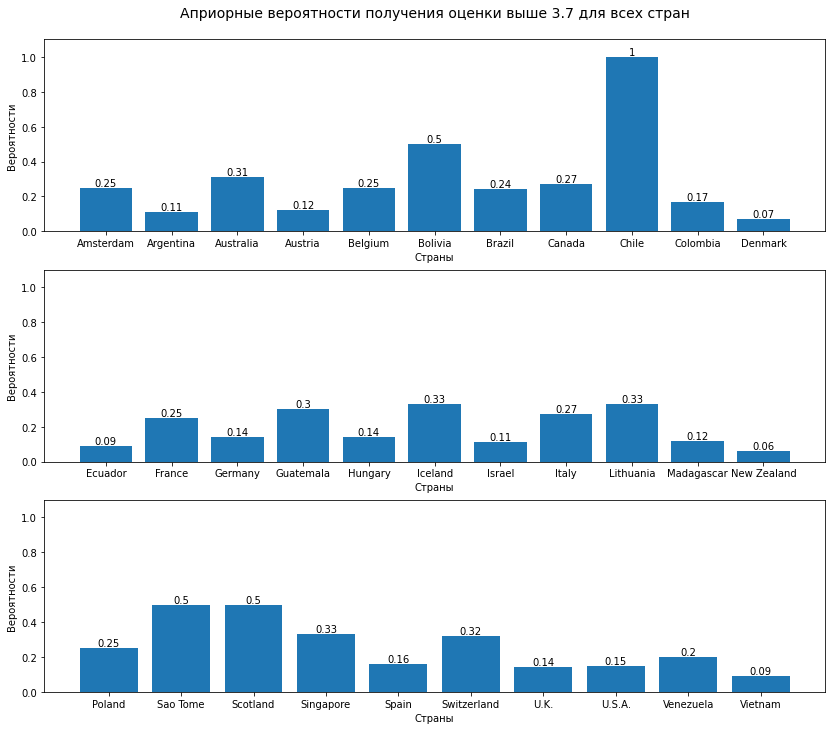

In [639]:
# Вероятность, что какао будет иметь оценку выше 3.7 баллов
n = df[df['Rating'] > 3.7].groupby('Company Location').count()['Rating']
total = df.groupby('Company Location').count()['Rating']
pa = (n / total).dropna()

pa1, pa2, pa3 = np.array_split(pa, 3)
fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(14, 12)
axes[0].set_title('Априорные вероятности получения оценки выше 3.7 для всех стран\n', fontsize=14)
axes[0].set_ylim([0, 1.1])
axes[0].set(xlabel='Страны', ylabel='Вероятности')
axes[0].bar_label(axes[0].bar(pa1.index, pa1.values.round(2)));
axes[1].set_ylim([0, 1.1])
axes[1].set(xlabel='Страны', ylabel='Вероятности')
axes[1].bar_label(axes[1].bar(pa2.index, pa2.values.round(2)));
axes[2].set_ylim([0, 1.1])
axes[2].set(xlabel='Страны', ylabel='Вероятности')
axes[2].bar_label(axes[2].bar(pa3.index, pa3.values.round(2)));

**Задание 2.** Используя их, посчитать вероятность того, что новый сорт какао с содержанием выше 73% (Cocoa Percent) будет иметь оценку выше 3.7 для стран:
<br><br>
a. Европы плюс Африки
<br>
b. Серверного полушария
<br>
c. Обеих Америк
<br>
d. Южного полушария

*__Этап 1.__ Составим списки стран, провинций и городов в соответствии с частями задания*

In [640]:
europe_and_africa = ['Amsterdam', 'Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Hungary', 'Iceland', 'Italy', 'Lithuania', 'Madagascar', 'Poland', 'Sao Tome', 'Scotland', 'Spain', 'Switzerland', 'U.K.']
northern_hemisphere = ['Amsterdam', 'Brazil', 'Austria', 'Colombia', 'Ecuador', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Sao Tome', 'Guatemala', 'Hungary', 'Vietnam', 'Singapore', 'Iceland', 'Israel', 'Italy', 'Lithuania', 'Poland', 'Scotland', 'Spain', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela']
america = ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Ecuador', 'Guatemala', 'U.S.A.', 'Venezuela']
southern_hemisphere = ['Australia', 'Bolivia', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Madagascar', 'New Zealand', 'Sao Tome']

*__Этап 2.__ Посчитаем вероятности по формуле Байеса P(A|B) = P(B|A) \* P(A)/P(B), где*
<br><br>
*P(A|B) – вероятность наступления события А при условии, что событие В уже случилось*
<br>
*P(B|A) – вероятность наступления события В при условии, что событие А уже случилось*
<br>
*P(A) – априорная вероятность наступления события А*
<br>
*P(B) – априорная вероятность наступления события В*

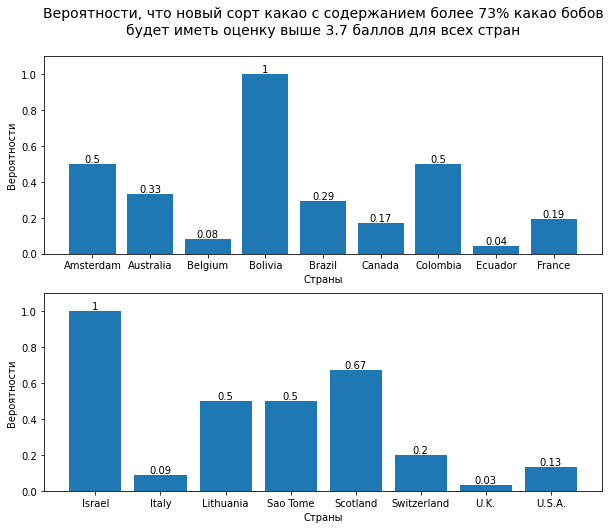

In [641]:
# pb - вероятность, что новый сорт какао будет содержать более 73% какао бобов
n = df[df['Cocoa Percent'].str[:-1].astype(float) > 73].groupby('Company Location').count()['Cocoa Percent']
total = df.groupby('Company Location').count()['Cocoa Percent']
pb = (n / total).dropna()

# pba - вероятность, что какао с оценкой выше 3.7 баллов содержит более 73% какао бобов
n = df[(df['Cocoa Percent'].str[:-1].astype(float) > 73) & (df['Rating'] > 3.7)].groupby('Company Location').count()['Rating']
total = df[df['Rating'] > 3.7].groupby('Company Location').count()['Rating']
pba = (n / total).dropna()

# pba - вероятность, что новый сорт какао с содержанием более 73% какао бобов будет иметь оценку выше 3.7 баллов
pab = (pba * pa / pb).dropna()

pab1, pab2 = np.array_split(pab, 2)
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(10, 8)
axes[0].set_title('Вероятности, что новый сорт какао с содержанием более 73% какао бобов\nбудет иметь оценку выше 3.7 баллов для всех стран\n', fontsize=14)
axes[0].set_ylim([0, 1.1])
axes[0].set(xlabel='Страны', ylabel='Вероятности')
axes[0].bar_label(axes[0].bar(pab1.index, pab1.values.round(2)));
axes[1].set_ylim([0, 1.1])
axes[1].set(xlabel='Страны', ylabel='Вероятности')
axes[1].bar_label(axes[1].bar(pab2.index, pab2.values.round(2)));

*a. Европа и Африка*

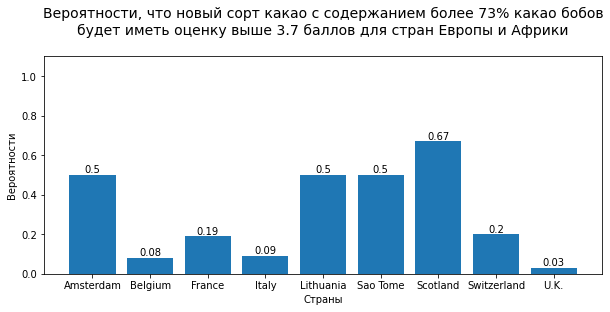

In [642]:
ixs = pab.index.intersection(europe_and_africa)

plt.figure(figsize=(10, 4))
plt.title('Вероятности, что новый сорт какао с содержанием более 73% какао бобов\nбудет иметь оценку выше 3.7 баллов для стран Европы и Африки\n', fontsize=14)
plt.xlabel('Страны')
plt.ylabel('Вероятности')
plt.ylim([0, 1.1])
plt.bar_label(plt.bar(pab.loc[ixs].index, pab.loc[ixs].values.round(2)));

*b. Северное полушарие*

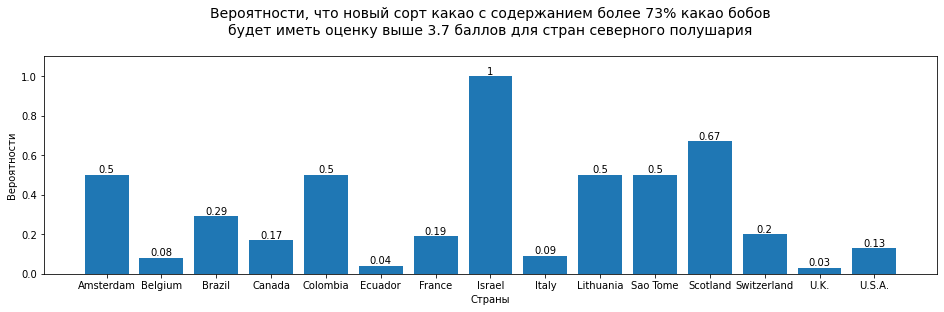

In [643]:
ixs = pab.index.intersection(northern_hemisphere)

plt.figure(figsize=(16, 4))
plt.title('Вероятности, что новый сорт какао с содержанием более 73% какао бобов\nбудет иметь оценку выше 3.7 баллов для стран северного полушария\n', fontsize=14)
plt.xlabel('Страны')
plt.ylabel('Вероятности')
plt.ylim([0, 1.1])
plt.bar_label(plt.bar(pab.loc[ixs].index, pab.loc[ixs].values.round(2)));

*c. Северная и Южная Америка*

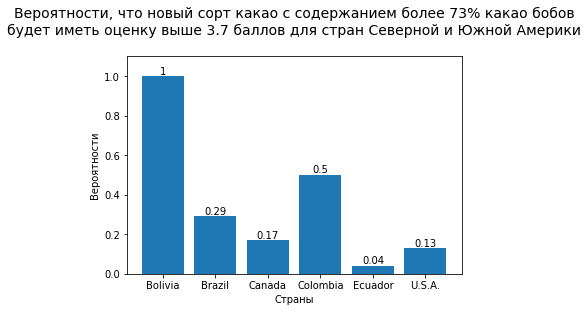

In [644]:
ixs = pab.index.intersection(america)

plt.figure(figsize=(6, 4))
plt.title('Вероятности, что новый сорт какао с содержанием более 73% какао бобов\nбудет иметь оценку выше 3.7 баллов для стран Северной и Южной Америки\n', fontsize=14)
plt.xlabel('Страны')
plt.ylabel('Вероятности')
plt.ylim([0, 1.1])
plt.bar_label(plt.bar(pab.loc[ixs].index, pab.loc[ixs].values.round(2)));

*d. Южное полушарие*

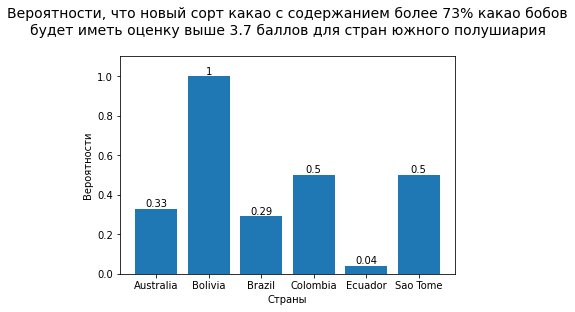

In [645]:
ixs = pab.index.intersection(southern_hemisphere)

plt.figure(figsize=(6, 4))
plt.title('Вероятности, что новый сорт какао с содержанием более 73% какао бобов\nбудет иметь оценку выше 3.7 баллов для стран южного полушиария\n', fontsize=14)
plt.xlabel('Страны')
plt.ylabel('Вероятности')
plt.ylim([0, 1.1])
plt.bar_label(plt.bar(pab.loc[ixs].index, pab.loc[ixs].values.round(2)));

**Задание 3.** Сделать прогноз, какова вероятность того, что обзоры какао после 2014 года будут иметь оценку выше медианной по всему периоду после 2010 года

*__Этап 1.__ Рассчитаем медианную оценку для обзоров какао периода после 2010 года*

In [646]:
median = df[df['Review Date'] > 2010]['Rating'].median()

print(f'Медианная оценка для обзоров какао периода после 2010 года составляет {round(median, 2)} баллов')

Медианная оценка для обзоров какао периода после 2010 года составляет 3.25 баллов


*__Этап 2.__ Сделаем прогноз, рассчитав вероятности по формуле Байеса*

In [647]:
# Вероятность, что оценка какао будет выше медианной за период после 2010 года
n = df[df['Rating'] > median]['Rating'].count()
total = df['Rating'].count()
pa = n / total

# Вероятность, что обзор какао будет датирован на период после 2014 года
n = df[df['Review Date'] > 2014]['Review Date'].count()
total = df['Review Date'].count()
pb = n / total

# Вероятность, что оценка какао выше медианной по периоду после 2010 года будет на обзор, датированный на период после 2014 года
n = df[(df['Review Date'] > 2014) & (df['Rating'] > median)]['Rating'].count()
total = df[df['Rating'] > median]['Rating'].count()
pba = n / total

# Вероятность, что обзоры какао после 2014 года будут иметь оценку выше медианной по периоду после 2010 года
pab = pba * pa / pb

print(f'Вероятность, что обзоры какао после 2014 года будут иметь оценку выше медианной по периоду после 2010 года составляет {round(pab, 2)}')

Вероятность, что обзоры какао после 2014 года будут иметь оценку выше медианной по периоду после 2010 года составляет 0.43
